# Классификация клиентов телеком компании

**Цель исследования** - создание оптимальной предсказательной модели для предложения клиентам лучшего тарифа из существующих на основании их потребительского поведения.

**Ход исследования:**
1. Проведение обзора данных.
2. Разбивка данных на обучающую, валидационну, тестовую выборки.
3. Исследование моделей.
4. Проверка моделей на тестовой выборке.
5. Проверка моделей на адекватность.

## Обзор данных

Импортируем необходимые для работы библиотеки.

In [1]:
# Импорт стандартных библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Прочитаем необходимые данные из файла.

In [2]:
try:
    df = pd.read_csv(('D:\\Users\\BlackEdition\\'
                      'Desktop\\Data Science\\Обучение в Яндекс\\'
                      '7. Введение в машинное обучение\\Проект\\users_behavior.csv'))
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

Выведем на экран общую информацию о датасете.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


### Вывод

Из обзора данных видно, что датасет полный, пропущенных данных нет. Тип данных соответствует содержимому. Классификация данных уже проведена и не требуется.

## Разбивка на выборки

Разобьем датасет на признаки(features) и целевой признак(target).

In [5]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

Выведем на экран для проверки результата.

In [6]:
display(features.shape, target.shape)

(3214, 4)

(3214,)

Разобьем данные на обучающую и промежуточную выборки (в пропорции 60%/40%).
Промежуточную выборку после разобьем на валидационную и тестовую (в пропорции 50%/50%).

In [7]:
(features_train, features_intermediate,
 target_train, target_intermediate) = (train_test_split(features, target,
                                                        test_size=.4,
                                                        random_state=12345))

Выведем результат.

In [8]:
display(features_train.shape,
        target_train.shape,
        features_intermediate.shape,
        target_intermediate.shape)

(1928, 4)

(1928,)

(1286, 4)

(1286,)

Разобьем валидационную выборку на валидационную и тестовую.

In [9]:
(features_valid, features_test,
 target_valid, target_test) = (train_test_split(features_intermediate,
                                                target_intermediate,
                                                test_size=.5,
                                                random_state=12345))

Выведем их на экран

In [10]:
display(features_valid.shape,
        features_test.shape,
        target_valid.shape,
        target_test.shape)

(643, 4)

(643, 4)

(643,)

(643,)

### Вывод

Датасет был разбит на обучающую(тренировочную), валидационную и тестовую выборки для дальнейшей оценки качества различных моделей.

## Исследование моделей

**Решающее дерево**

Исследуем модель решающего дерева с глубиной от 1 до 8.

In [11]:
%%time

best_tree_model = None  # Переменная для хранения информации о лучшей модели
best_depth = 0  # Переменная для хранения информации о лучшей глубине дерева
best_accuracy_valid = 0  # Переменная для хранения информации о лучшей точности

for depth in range(1, 9):
    model_decision_tree = DecisionTreeClassifier(random_state=12345,
                                                 max_depth=depth)
    model_decision_tree.fit(features_train, target_train)
    prediction_train = model_decision_tree.predict(features_train)
    prediction_valid = model_decision_tree.predict(features_valid)
    accuracy_train = accuracy_score(target_train, prediction_train)
    accuracy_valid = accuracy_score(target_valid, prediction_valid)
    print(f'Максимальная глубина: {depth}')
    print(f'Качество на обучающей выборке: {accuracy_train}')
    print(f'Качество на валидационной выборке: {accuracy_valid}')
    print()
    if accuracy_valid > best_accuracy_valid:
        best_depth = depth
        best_accuracy_valid = accuracy_valid
        best_tree_model = model_decision_tree

print((f'Лучшая модель | глубина {best_depth}',
         f'качество {best_accuracy_valid}'))

Максимальная глубина: 1
Качество на обучающей выборке: 0.7577800829875518
Качество на валидационной выборке: 0.7542768273716952

Максимальная глубина: 2
Качество на обучающей выборке: 0.7878630705394191
Качество на валидационной выборке: 0.7822706065318819

Максимальная глубина: 3
Качество на обучающей выборке: 0.8075726141078838
Качество на валидационной выборке: 0.7853810264385692

Максимальная глубина: 4
Качество на обучающей выборке: 0.8106846473029046
Качество на валидационной выборке: 0.7791601866251944

Максимальная глубина: 5
Качество на обучающей выборке: 0.8200207468879668
Качество на валидационной выборке: 0.7791601866251944

Максимальная глубина: 6
Качество на обучающей выборке: 0.8376556016597511
Качество на валидационной выборке: 0.7838258164852255

Максимальная глубина: 7
Качество на обучающей выборке: 0.8558091286307054
Качество на валидационной выборке: 0.7822706065318819

Максимальная глубина: 8
Качество на обучающей выборке: 0.8625518672199171
Качество на валидационн

**Случайный лес**

Исследуем модель случайного леса с количеством деревьев до 27, глубиной до 9.

In [12]:
%%time


best_forest_model = None  # Переменная для хранения информации о лучшей модели
best_est = 0  # Переменная для хранения информации о количестве деревьев
best_depth = 0  # Переменная для хранения информации о глубине деревьев
best_accuracy = 0  # Переменная для хранения информации о лучшей точности

for est in range(1, 101):
    for depth in range(1, 11):
        model_random_forest = RandomForestClassifier(random_state=12345,
                                                     n_estimators=est,
                                                     max_depth=depth)
        model_random_forest.fit(features_train, target_train)
        prediction_valid = model_random_forest.predict(features_valid)
        accuracy = accuracy_score(target_valid, prediction_valid)
        if accuracy > best_accuracy:
            best_est = est
            best_depth = depth
            best_accuracy = accuracy
            best_forest_model = model_random_forest

print(f'Лучшая модель | количество деревьев {best_est}',
        f'глубина {best_depth}',
        f'качество {best_accuracy}')

Лучшая модель | количество деревьев 40 глубина 8 качество 0.8087091757387247
Wall time: 3min 4s


**Логистическая регрессия**

Исследуем модель логистической регрессии с максимальной итерацией 100.

In [13]:
%%time

best_regression_model = None  # Переменная для хранения информации о лучшей модели

model_logistic_regression = LogisticRegression(random_state=12345,
                                               solver='lbfgs',
                                               max_iter=100)
model_logistic_regression.fit(features_train, target_train)
prediction_valid = model_logistic_regression.predict(features_valid)
accuracy = accuracy_score(target_valid, prediction_valid)
best_regression_model = model_logistic_regression

print(f'Лучшая модель | качество {accuracy}')

Лучшая модель | качество 0.7107309486780715
Wall time: 31.9 ms


### Вывод

Исходя из проведенной проверки точности моделей можно сделать вывод, что самой качественной моделью для данного набора данных является "Случайный лес", с точностью 81%. Количество деревьев - 40, глубина - 8.

## Проверка модели на тестовой выборке

Проверим модель случайного леса на тестовой выборке.

**Проверка случайного леса**

In [14]:
prediction_test = best_forest_model.predict(features_test)
accuracy = accuracy_score(target_test, prediction_test)
display(f'Качество модели на тестовой выборке: {accuracy}')

'Качество модели на тестовой выборке: 0.7962674961119751'

# Вывод

На тестовой выборке результат у модели чуть хуже, чем на валидационной - 80%.

## Проверка модели на адекватность

Проверим адеватность моделей с помощью ROC-кривой для бинарной классификации.

**Решающее дерево**

'AUC-ROC = '

0.6990315718763994

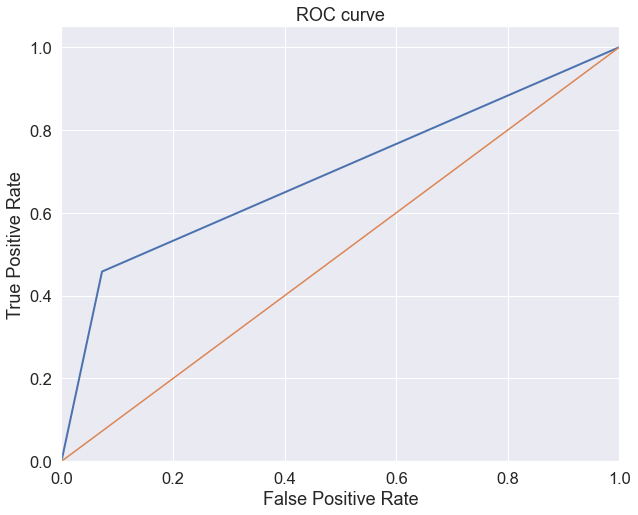

In [15]:
# Расчет площади под кривой рабочих характеристик приемника (AUC-ROC).
display('AUC-ROC = ', roc_auc_score(target_test,
                                    best_tree_model.predict_proba(features_test)[:, 1]))

# Построение графика
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(target_test,
                                 best_tree_model.predict(features_test), pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Из полученных данных видно, что площадь AUC-ROC = 70% по сравнению с accuracy 79%.

**Случайный лес**

'AUC-ROC = '

0.8242330944917151

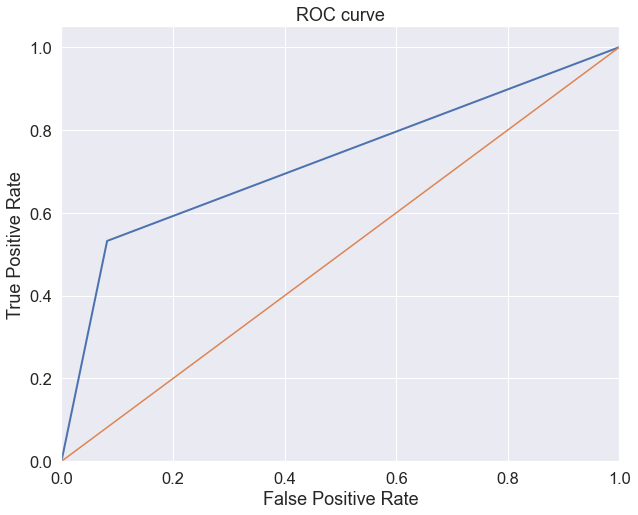

In [16]:
# Расчет площади под кривой рабочих характеристик приемника (AUC-ROC).
display('AUC-ROC = ', roc_auc_score(target_test,
                                    best_forest_model.predict_proba(features_test)[:, 1]))

# Построение графика
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(target_test,
                                 best_forest_model.predict(features_test), pos_label=1)
plt.plot(fpr, tpr, lw=2, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Из полученных данных видно, что площадь AUC-ROC = 82% по сравнению с accuracy 81%.

**Проверка логистической регрессии**

'AUC-ROC = '

0.44510747872816836

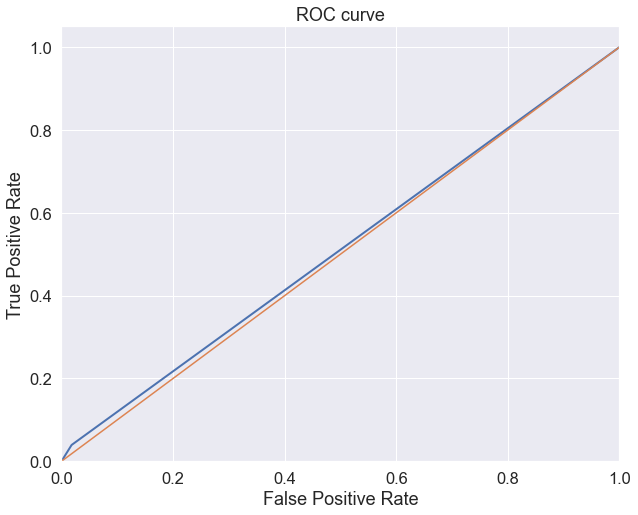

In [17]:
# Расчет площади под кривой рабочих характеристик приемника (AUC-ROC).
display('AUC-ROC = ', roc_auc_score(target_test,
                                    best_regression_model.predict_proba(features_test)[:, 1]))

# Построение графика
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(target_test,
                                 best_regression_model.predict(features_test), pos_label=1)
plt.plot(fpr, tpr, lw=2, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Из полученных данных видно, что площадь AUC-ROC = 45% по сравнению с accuracy 71%.

In [18]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf.predict(features_valid)
dummy_clf.score(features_train, target_train)

0.6924273858921162

### Вывод

Из анализа площади AUC-ROC видно, что наилучшее качество неизменно показывает модель Случайного леса. 

## Общий вывод

Нами были рассмотрены три модели бинарной классификации с перебором гиперпараметров:
1. Решающее дерево.
2. Случайный лес.
3. Логистическая регрессия.

По итогам рассмотрения наилучее качество показал Случайный лес.

Точность(Accuracy) Случайного леса составила 81% на валидационной выборке, 80% на тестовой выборке и 82% при проверке площади под кривой рабочих характеристик приемника (AUC-ROC).